In [178]:
import pandas as pd
from matplotlib import pyplot as plt 

Najprej vse naše podatke predstavimo v tabeli.

In [79]:
nepremicnine = pd.read_csv(r'..\projektna_naloga_nepremicnine\projektna_naloga_nepremicnine\oglasi.csv')

In [80]:
nepremicnine

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija
0,Castle,Vélines (24),1366200,390,6,1,ni podatka o agenciji
1,House with pool and terrace,Uzès (30),1025000,219,4,1,By Styles
2,Villa with pool,Uzès (30),448200,105,3,1,By Cigal&#39;immo
3,House with pool,Lourmarin (84),861900,120,4,coerce,By Michaël Zingraf Christie&#39;s Internationa...
4,House with pool and terrace,Nice (06),1074600,152,5,1,By Michaël Zingraf Real Estate Nice
...,...,...,...,...,...,...,...
1027,House with garden,Saintes (17),737100,375,6,coerce,By Mercure Forbes Global Properties Poitou-cha...
1028,House with pool,Saintes (17),646400,256,5,coerce,By Mercure Forbes Global Properties Poitou-cha...
1029,House,Celles-sur-Belle (79),737100,400,5,coerce,By Mercure Forbes Global Properties Poitou-cha...
1030,House with pool,Poitiers (86),795700,350,6,coerce,By Mercure Forbes Global Properties Poitou-cha...


Želimo dobiti boljši občutek o podatkih, zato bomo za vsak oglasi izračunali še ceno glede na površino hiše. Te podatke bomo dodali v tabelo v dodatni stolpec. Nato bomo podatke še sortirali naraščajoče glede na ceno na kvadrat.

In [81]:
nepremicnine['cena'] = pd.to_numeric(nepremicnine['cena'], errors='coerce')
nepremicnine['površina'] = pd.to_numeric(nepremicnine['površina'], errors='coerce')

In [82]:
nepremicnine['cena_glede_na_površino_hiše'] = round(nepremicnine.cena / nepremicnine.površina)

In [83]:
nepremicnine.sort_values('cena_glede_na_površino_hiše')

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija,cena_glede_na_površino_hiše
841,House,Tarascon (13),280800.0,358.0,7,coerce,By 36 Heures Immo,784.0
219,House,La Rochelle (17),673700.0,700.0,14,coerce,By Diva,962.0
1002,House,Vendome (41),317500.0,320.0,6,coerce,By Agence Mellinger Immobilier,992.0
917,House with pool,Saint-Mesmin (10),430900.0,414.0,5,1,By Yves Damonte Immobilier,1041.0
737,House with pool and garden,Aulnay (17),572400.0,532.0,12,1,By Rochella Immobilier,1076.0
...,...,...,...,...,...,...,...,...
32,Seaside contemporary house with pool and garden,Agde (34),NaN,121.0,3,1,By Maison Kamci,NaN
33,Villa with pool and terrace,Baden (56),NaN,186.0,4,1,By Immo-sea,NaN
368,House with pool,Fourneville (14),1077300.0,NaN,4,1,By Barnes Deauville,NaN
588,House,Sallenelles (14),907200.0,NaN,5,coerce,By Barnes Deauville,NaN


In [84]:
maximalna_povrsina = nepremicnine.površina.max()
minimalna_povrsina = nepremicnine.površina.min()
povprecna_povrsina = round(nepremicnine.površina.mean())

In [85]:
print(f'Površine obravnavanih nepremičnin zavzemajo vrednosti med {minimalna_povrsina} m² in {maximalna_povrsina} m², v povprečju pa hiša meri {povprecna_povrsina}m²')

Površine obravnavanih nepremičnin zavzemajo vrednosti med 60.0 m² in 710.0 m², v povprečju pa hiša meri 198m²


Iz vseh podatkov izračunamo še povprečno ceno na kvadratni meter hiše.

In [86]:
povprecje = nepremicnine.cena_glede_na_površino_hiše.mean()

In [260]:
print(f'Kvadratni meter hiše povprečno stane {round(povprecje)}€.')

Kvadratni meter hiše povprečno stane 4088€.


Radi bi še dobili občutek koliko posesti posameznega "tipa" nepremičnine imamo (npr. koliko hiš, hiš s teraso, vil..). To bomo za lažjo predstavo uprizorili s stolpičnim diagramom. Predstavili bomo samo tiste tipe posesti, ki se pojavijo več kot dvakrat.

<Axes: xlabel='tip_hiše'>

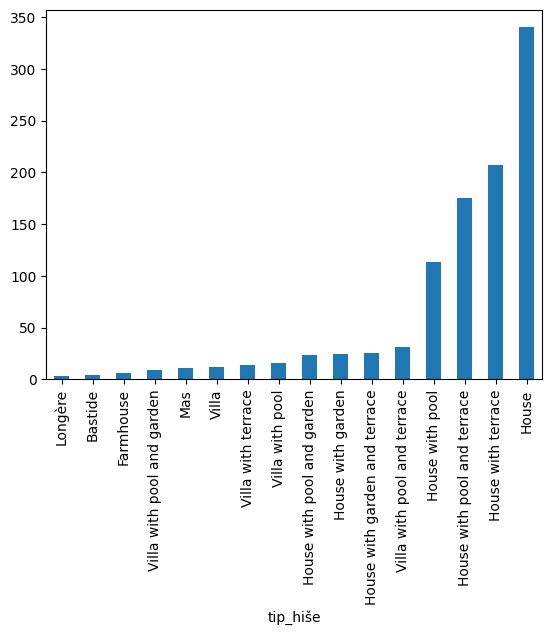

In [92]:
nepremicnine.groupby('tip_hiše').size().sort_values().tail(16).plot.bar()

Želimo izvedeti še kakšna je okvirna povrprečna velikost posamezne sobe znotraj nepremičnine. Predpostavili bomo, da ima vsaka hiša poleg spalnic in kopalnic še tri sobe (hodnik, kuhinjo in dnevno sobo), če število kopalnic ni podano bomo privzeli, da ima hiša približno po eno kopalnico na dve spalnici. Število spalnic bomo torej delili z dva, zaokrožili navzdol in dobljenemu številu pripisali vrednost števila kopalnic. Novo pridobljene podatke o številu sob bomo dodatno spravili v tabelo.

In [140]:
for indeks in nepremicnine.index:
    if nepremicnine['število_spalnic'][indeks] == 'coerce':
        nepremicnine['število_sob'][indeks] = 'coerce'
    elif (nepremicnine['število_kopalnic'][indeks] == 'coerce') and (nepremicnine['število_spalnic'][indeks] != 'coerce'):
        nepremicnine['število_sob'][indeks] = int(nepremicnine['število_spalnic'][indeks]) + (int(nepremicnine['število_spalnic'][indeks]) // 2 ) + 3
    elif (nepremicnine['število_spalnic'][indeks] != 'coerce') and (nepremicnine['število_spalnic'][indeks] != 'coerce'):
        nepremicnine['število_sob'][indeks] = int(nepremicnine['število_spalnic'][indeks]) + int(nepremicnine['število_kopalnic'][indeks]) + 3


In [141]:
nepremicnine

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija,cena_glede_na_površino_hiše,število_sob
0,Castle,Vélines (24),1366200.0,390.0,6,1,ni podatka o agenciji,3503.0,10
1,House with pool and terrace,Uzès (30),1025000.0,219.0,4,1,By Styles,4680.0,8
2,Villa with pool,Uzès (30),448200.0,105.0,3,1,By Cigal&#39;immo,4269.0,7
3,House with pool,Lourmarin (84),861900.0,120.0,4,coerce,By Michaël Zingraf Christie&#39;s Internationa...,7182.0,9
4,House with pool and terrace,Nice (06),1074600.0,152.0,5,1,By Michaël Zingraf Real Estate Nice,7070.0,9
...,...,...,...,...,...,...,...,...,...
1027,House with garden,Saintes (17),737100.0,375.0,6,coerce,By Mercure Forbes Global Properties Poitou-cha...,1966.0,12
1028,House with pool,Saintes (17),646400.0,256.0,5,coerce,By Mercure Forbes Global Properties Poitou-cha...,2525.0,10
1029,House,Celles-sur-Belle (79),737100.0,400.0,5,coerce,By Mercure Forbes Global Properties Poitou-cha...,1843.0,10
1030,House with pool,Poitiers (86),795700.0,350.0,6,coerce,By Mercure Forbes Global Properties Poitou-cha...,2273.0,12


Sedaj lahko s pomočjo dodanega stolpca izračunamo povprečno velikost posamezne sobe.

In [142]:
nepremicnine['število_sob'] = pd.to_numeric(nepremicnine['število_sob'], errors='coerce')

In [145]:
povprecna_velikost_sobe_v_oglasu = round(nepremicnine.površina / nepremicnine.število_sob)

In [262]:
maximum_soba = round(povprecna_velikost_sobe_v_oglasu.max())
minimum_soba = round(povprecna_velikost_sobe_v_oglasu.min())
povprecje_soba = (round(povprecna_velikost_sobe_v_oglasu.mean(), 1))

print(f'Povprečne velikost posamezne sobe obravnavanih nepremičnin zavzemajo vrednosti med\n {minimum_soba}m² in {maximum_soba}m², v povprečju pa soba meri {povprecje_soba}m²')


Povprečne velikost posamezne sobe obravnavanih nepremičnin zavzemajo vrednosti med
 8m² in 69m², v povprečju pa soba meri 21.7m²


Poglejmo še katere nepremičninske agencije so najbolj zastopane med danimi podatki. Izberimo prvih deset agencij, ki so objavile največ oglasov.

<Axes: >

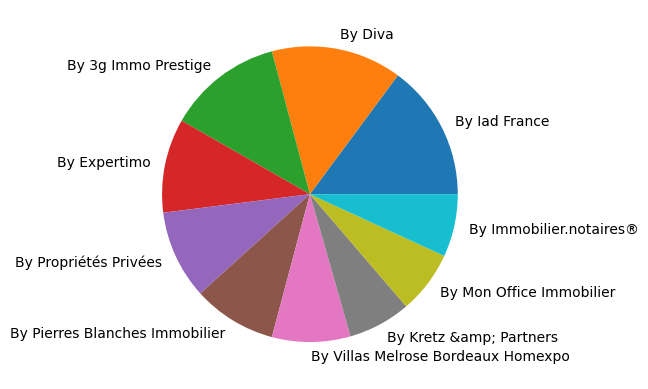

In [179]:
nepremicnine.groupby('agencija').size().sort_values(ascending=False).head(10).plot.pie()

Iz podatkov na tortnem diagramu je razvidno, da se med prvimi desetimi agencijami ne nahaja razdelek "ni podatka o agenciji", iz česar lahko sklepamo, da večino nepremičninskih oglasov objavijo uradne nepremičninske agencije in ne fizične osebe same.

Podatke želimo združiti še po lokaciji. Pri tem nam bo v pomoč številka regije, ki je v zapisana ob imenu kraja. V tabelo dodajmo še zadnji dodatni stolpec, ki bo vseboval le številko regije.

In [197]:
nepremicnine['regija'] = (nepremicnine['lokacija'].str[-3 : -1])

In [223]:
nepremicnine['regija'] = pd.to_numeric(nepremicnine['regija'], errors='coerce', downcast="signed") 

In [225]:
nepremicnine

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija,cena_glede_na_površino_hiše,število_sob,regija
0,Castle,Vélines (24),1366200.0,390.0,6,1,ni podatka o agenciji,3503.0,10.0,24.0
1,House with pool and terrace,Uzès (30),1025000.0,219.0,4,1,By Styles,4680.0,8.0,30.0
2,Villa with pool,Uzès (30),448200.0,105.0,3,1,By Cigal&#39;immo,4269.0,7.0,30.0
3,House with pool,Lourmarin (84),861900.0,120.0,4,coerce,By Michaël Zingraf Christie&#39;s Internationa...,7182.0,9.0,84.0
4,House with pool and terrace,Nice (06),1074600.0,152.0,5,1,By Michaël Zingraf Real Estate Nice,7070.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...
1027,House with garden,Saintes (17),737100.0,375.0,6,coerce,By Mercure Forbes Global Properties Poitou-cha...,1966.0,12.0,17.0
1028,House with pool,Saintes (17),646400.0,256.0,5,coerce,By Mercure Forbes Global Properties Poitou-cha...,2525.0,10.0,17.0
1029,House,Celles-sur-Belle (79),737100.0,400.0,5,coerce,By Mercure Forbes Global Properties Poitou-cha...,1843.0,10.0,79.0
1030,House with pool,Poitiers (86),795700.0,350.0,6,coerce,By Mercure Forbes Global Properties Poitou-cha...,2273.0,12.0,86.0


Poglejmo si prvih deset regij, v katerih regijah se nahaja največ nepremičnin. S pomočjo izvorne spletne strani, lahko posamezni številki regije dodelimo tudi njeno realno geografsko ime.

In [247]:
regije_z_najvec_nepremicninami = nepremicnine.groupby('regija').size().sort_values(ascending=False).head(10)

In [259]:
regije_z_najvec_nepremicninami

regija
33.0    77
30.0    63
83.0    63
13.0    60
34.0    57
17.0    43
44.0    36
56.0    32
78.0    29
84.0    28
dtype: int64

To so v enakem vrstnem redu od najbolj zastopane regije do najmanj zastopane regije torej; Gironde, Gard, Var, Bouches-du-Rhône, Hérault, Charente-Maritime, Loire-Atlantique, Morbihan, Yvelines, Vaucluse.

Želimo preveriti še, ali obstaja pomembna povezava med ceno in regijo, torej ali so posamezne nepremičnine v nekaterih regijah očitno dražje/cenejše kot v nekaterih drugih. To bomo naredili s pomočjo spodnjega grafa.

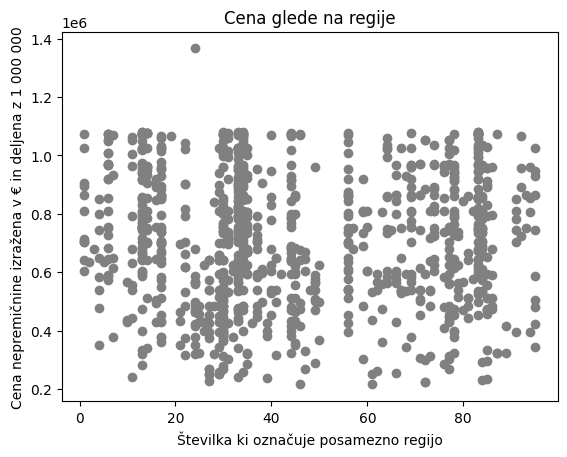

In [257]:
plt.scatter(nepremicnine['regija'], nepremicnine['cena'], c='gray')

plt.title('Cena glede na regije')
plt.xlabel('Številka ki označuje posamezno regijo')
plt.ylabel('Cena nepremičnine izražena v € in deljena z 1 000 000')

plt.show()

Čeprav opazimo nekolikšno zgoščenost pri nekaterih regijah, očiten vzorec ni razviden.